In [169]:
#comparing no shows to age
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

C:\Users\edpel\AppData\Local\Temp\ipykernel_9120\574437027.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_group=df.groupby('Age_Group')


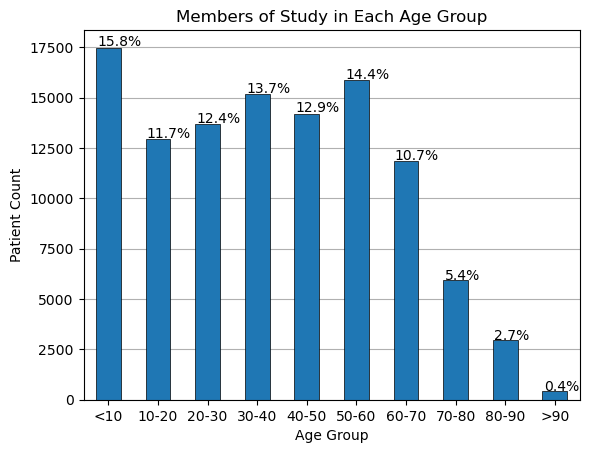

In [170]:
#separating age groups with bins, counting how many people in each age group, plotting by percentage
df = pd.read_csv('data_cleaned.csv')
group_by_age = df.groupby('Age')
bins = [0,10,20,30,40,50,60,70,80,90,120]
labels=['<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','>90']
df['Age_Group']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grouped_by_age_group=df.groupby('Age_Group')
num_age_group=df['Age_Group'].value_counts().sort_index()
ax = num_age_group.plot(kind = 'bar',
            xlabel = 'Age Group',
            ylabel = 'Patient Count',
            title = 'Members of Study in Each Age Group',
            edgecolor = 'black',
            rot = 0,
            linewidth=.5,
            
            )

ax.grid(axis='y')
ax.set_axisbelow(True)
total_count = len(df['Age_Group'])
age_group_percent = [round(100 * count / total_count, 1) for count in num_age_group]
i=0
for p in ax.patches:
    ax.annotate(f"{age_group_percent[i]}%", (p.get_x() + p.get_width() / 20, p.get_height() * 1.005))
    i += 1
    
plt.savefig(r'C:\users\edpel\OneDrive\Desktop\Project1\Members_of_Study_in_each_age_group.png')

In [171]:
#calculating average age in the study
mean_age=df['Age'].mean()
median_age=df['Age'].median()
print(f"the mean age is {mean_age}")
print(f"the median age is {median_age}")

the mean age is 37.089218826339504
the median age is 37.0


In [172]:
#how many shows vs no shows per age group

no_shows_by_age_group= df.groupby('Age_Group')['No_Show'].value_counts()
no_shows_by_age_group = no_shows_by_age_group.reset_index()
no_shows_by_age_group


C:\Users\edpel\AppData\Local\Temp\ipykernel_9120\3066022760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_shows_by_age_group= df.groupby('Age_Group')['No_Show'].value_counts()


,Age_Group,No_Show,count
0,<10,No,13991
1,<10,Yes,3484
2,10-20,No,9679
3,10-20,Yes,3257
4,20-30,No,10319
5,20-30,Yes,3380
6,30-40,No,11871
7,30-40,Yes,3300
8,40-50,No,11329
9,40-50,Yes,2880


In [173]:
#proportion of no shows by age group
no_shows_by_age_group_merged = pd.merge(no_shows_by_age_group, num_age_group, how = 'left', on='Age_Group')
no_shows_by_age_group_merged['Proportion'] = no_shows_by_age_group_merged['count_x'] / no_shows_by_age_group_merged['count_y']
no_shows_by_age_group_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_age_group_merged

,Age_Group,No_Show,Count,Total,Proportion
0,<10,No,13991,17475,0.800629
1,<10,Yes,3484,17475,0.199371
2,10-20,No,9679,12936,0.748222
3,10-20,Yes,3257,12936,0.251778
4,20-30,No,10319,13699,0.753267
5,20-30,Yes,3380,13699,0.246733
6,30-40,No,11871,15171,0.782480
7,30-40,Yes,3300,15171,0.217520
8,40-50,No,11329,14209,0.797312
9,40-50,Yes,2880,14209,0.202688


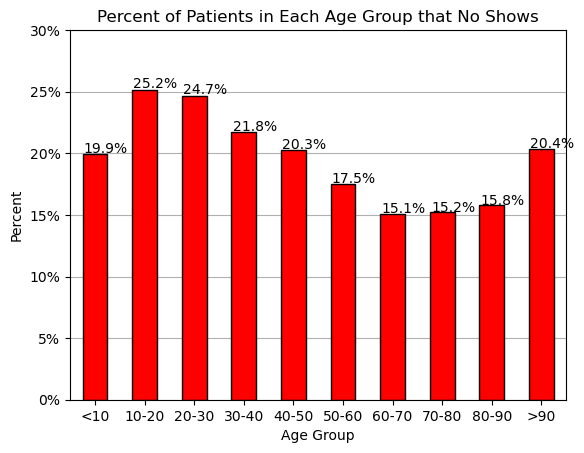

In [174]:
#plotting proportions
ax = no_shows_by_age_group_merged[no_shows_by_age_group_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Age_Group',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Age Group',
                                                                                 ylabel= 'Percent',
                                                                                 title = 'Percent of Patients in Each Age Group that No Shows',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,
                                                                                legend=False
                                                                                )
ax.grid(axis='y')
ax.set_axisbelow(True)
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/20, p.get_height() * 1.005))
plt.savefig(r'C:\users\edpel\OneDrive\Desktop\Project1\no_show_proportions_in_each_age_group.png')

In [ ]:
# It appears that no-show rates drop significantly after the age of 50.
# This could be due to several factors, the obvious one being that more issues crop up when you age--one is probably more likely to skip a checkup at 35 than skipping one at 55.
# Individuals are also more likely to have other issues that require specialist attention when they age, which is a futher incentive to attend appointments.
# We also see that children are more likely to attend than adults who are younger than 50, most likely for similar reasons as the older population in some respects.
# Children have in general more health issues than adults, but we also need to note that they're (in most cases) not responsible for their own attendance.
# Parents are more likely to ensure their children attend their appointments than ensuring that they attend their own. 